# Application Pipeline

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/application-pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/application-pipeline).
    
</div>

### Use case

1. Read wav file.
2. Apply noise reduction.
3. Generate smaller frames for VAD. Read more about VAD at [malaya-speech/example/vad](https://github.com/huseinzol05/malaya-speech/tree/master/example/vad).
4. Detect VAD for each smaller frames.
5. Visualize VAD.
6. Group by VAD.

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

In [2]:
y, sr = malaya_speech.load('speech/podcast/example.wav')
len(y), sr

(200160, 16000)

In [3]:
vad = malaya_speech.vad.webrtc(sample_rate = sr, minimum_amplitude = int(np.quantile(np.abs(y), 0.2)))

### Visualization pipeline

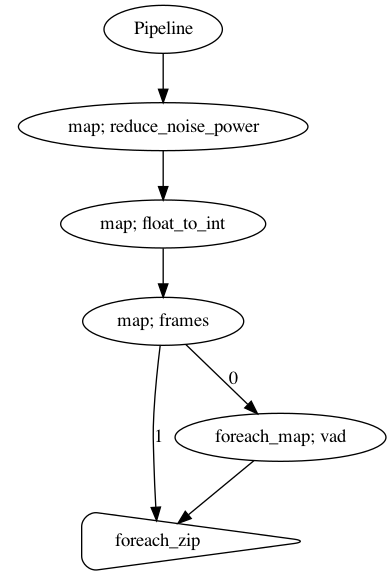

In [4]:
p = Pipeline()
frame = (
    p.map(malaya_speech.noise_reduction.reduce_noise_power)
    .map(malaya_speech.utils.astype.float_to_int)
    .map(malaya_speech.utils.generator.frames)
)
vad_map = frame.foreach_map(vad)
foreach = frame.foreach_zip(vad_map)
p.visualize()

In [5]:
result = p(y)
result.keys()

dict_keys(['reduce_noise_power', 'float_to_int', 'frames', 'vad', 'foreach_zip'])

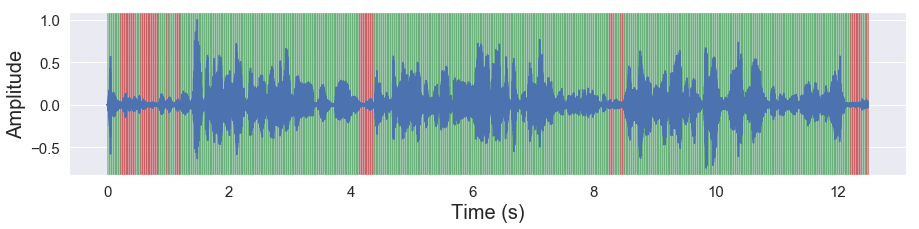

In [7]:
malaya_speech.extra.visualization.visualize_vad(y, result['foreach_zip'], sr)

### Groupby pipeline

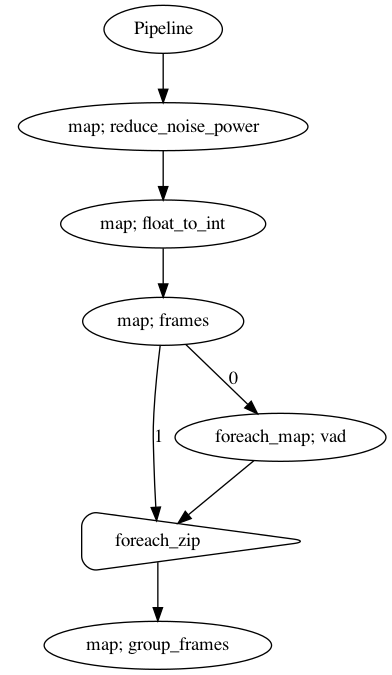

In [8]:
foreach.map(malaya_speech.group.group_frames)
p.visualize()

In [9]:
result = p(y)

In [10]:
result['group_frames']

[(<malaya_speech.model.frame.Frame at 0x1470282d0>, True),
 (<malaya_speech.model.frame.Frame at 0x146fe4350>, False),
 (<malaya_speech.model.frame.Frame at 0x147028090>, True),
 (<malaya_speech.model.frame.Frame at 0x147028590>, False),
 (<malaya_speech.model.frame.Frame at 0x147028890>, True),
 (<malaya_speech.model.frame.Frame at 0x147028750>, False),
 (<malaya_speech.model.frame.Frame at 0x147026e10>, True),
 (<malaya_speech.model.frame.Frame at 0x147026d10>, False),
 (<malaya_speech.model.frame.Frame at 0x147026f10>, True),
 (<malaya_speech.model.frame.Frame at 0x147028c10>, False),
 (<malaya_speech.model.frame.Frame at 0x147026f50>, True),
 (<malaya_speech.model.frame.Frame at 0x147026d90>, False),
 (<malaya_speech.model.frame.Frame at 0x147026dd0>, True),
 (<malaya_speech.model.frame.Frame at 0x14702f310>, False),
 (<malaya_speech.model.frame.Frame at 0x14702f350>, True),
 (<malaya_speech.model.frame.Frame at 0x14702f3d0>, False),
 (<malaya_speech.model.frame.Frame at 0x14702f39